<a href="https://colab.research.google.com/github/wahyudi0018/ML_Ganjil_2024/blob/main/Kuis1_boilerplate_kelompok6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import joblib
import os


* numpy (np): Digunakan untuk operasi numerik, terutama yang melibatkan array multidimensi dan aljabar linier.
* pandas (pd): Digunakan untuk manipulasi dan analisis data, dengan struktur data seperti DataFrame untuk pengolahan data yang lebih mudah.
* sklearn.datasets.fetch_lfw_people: Mengunduh dataset "Labeled Faces in the Wild" (LFW) yang berisi gambar wajah berlabel untuk tugas klasifikasi wajah.
* sklearn.model_selection.train_test_split: Digunakan untuk membagi dataset menjadi dua bagian, yaitu data latih dan data uji, dengan proporsi tertentu.
* sklearn.svm.SVC: Mengimplementasikan model Support Vector Machine (SVM) untuk melakukan klasifikasi, cocok untuk dataset berukuran besar atau kompleks.
* sklearn.metrics: Berisi berbagai fungsi untuk mengevaluasi performa model, termasuk confusion_matrix (membuat matriks kebingungan), accuracy_score (menghitung akurasi), dan classification_report (memberikan laporan lengkap performa klasifikasi).
* matplotlib.pyplot (plt): Library utama untuk membuat visualisasi data seperti grafik dan plot dalam Python.
* seaborn (sns): Dibangun di atas matplotlib untuk membuat visualisasi statistik yang lebih menarik dan informatif dengan sedikit kode.
* cv2 (cv): OpenCV, digunakan untuk pemrosesan citra komputer seperti membaca, menampilkan, dan memodifikasi gambar.
* joblib: Digunakan untuk menyimpan model machine learning yang sudah dilatih ke dalam file, serta memuatnya kembali untuk digunakan nanti.
* os: Digunakan untuk berinteraksi dengan sistem operasi, seperti menangani direktori dan file.


# Load Data

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=100, color=True)

*  min_faces_per_person=100: Hanya orang yang memiliki setidaknya 100 gambar wajah yang akan dimasukkan ke dalam dataset.
*  color=True: Gambar yang diunduh adalah gambar berwarna (dengan 3 channel warna: RGB).


In [ ]:
# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

* len(faces.target_names): Menampilkan jumlah total label unik dalam dataset, yaitu jumlah orang berbeda yang wajahnya terdapat di dataset.
* faces.images.shape: Menampilkan dimensi data gambar asli dalam bentuk (jumlah gambar, tinggi gambar, lebar gambar). Ini menunjukkan ukuran dataset, tinggi, dan lebar dari setiap gambar wajah.
* faces.data.shape: Menampilkan dimensi data gambar setelah "flattening" (mengubah gambar 2D menjadi vektor 1D) untuk keperluan pemrosesan machine learning. Bentuknya akan berupa (jumlah gambar, jumlah piksel per gambar), di mana setiap gambar telah diubah menjadi baris vektor piksel.


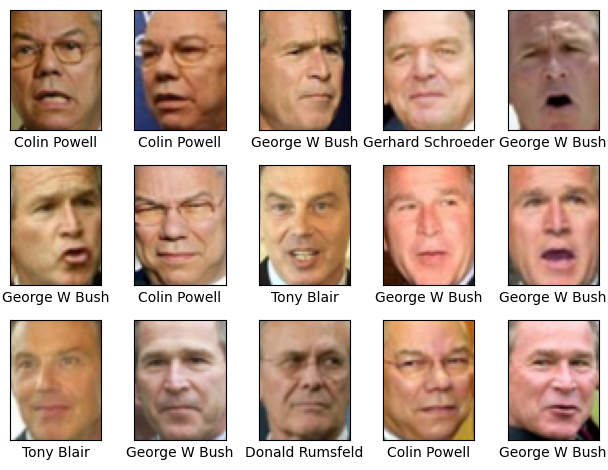

In [ ]:
#@title Generate 15 gambar acak dengan seeding untuk konsistensi
np.random.seed(42)
rand_labels = np.random.choice(len(faces.data), 15, replace=False)

# Plot gambar-gambar tersebut
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Apply layout adjustment
fig.tight_layout()
plt.show()

* np.random.seed(42)

  Mengatur seed untuk generator angka acak, sehingga setiap kali kode dijalankan hasilnya akan konsisten dan dapat diulang. Dalam hal ini, seed diatur ke 42.

* rand_labels = np.random.choice(len(faces.data), 15, replace=False)

  Membuat array rand_labels yang berisi 15 indeks acak tanpa pengulangan (replace=False) dari dataset faces. Indeks ini digunakan untuk memilih gambar secara acak dari dataset.
  - np.random.choice(len(faces.data), 15, replace=False): Memilih 15 angka acak dari 0 hingga panjang dataset (len(faces.data)), di mana setiap angka mewakili indeks sebuah gambar dalam dataset. replace=False memastikan tidak ada indeks yang terulang.

* fig, ax = plt.subplots(3, 5)

  Membuat figure dan axes untuk plot.
  - fig: Merepresentasikan keseluruhan figure (jendela) plot.
  - ax: Array 2 dimensi yang berisi objek axes. Setiap elemen ax merepresentasikan satu subplot di dalam grid 3x5.
  - plt.subplots(3, 5): Membuat grid subplot dengan 3 baris dan 5 kolom.

* fig.tight_layout()

  Menyesuaikan tata letak subplot agar tidak tumpang tindih dan memastikan plot terlihat rapi dan label gambar tidak saling menutupi.

* for i, axi in enumerate(ax.flat):

  Loop ini mengiterasi setiap subplot dalam grid. Digunakan untuk menampilkan gambar dan label pada setiap subplot.
  - enumerate(ax.flat): ax.flat mengubah array ax yang berdimensi 2 menjadi iterator 1 dimensi. enumerate memberikan indeks (i) dan nilai (axi, yaitu objek axes) untuk setiap subplot.

* axi.imshow(faces.images[rand_labels[i]], cmap='bone')

  - Menampilkan gambar pada subplot yang dipilih secara acak menggunakan indeks dari rand_labels.
  - faces.images[rand_labels[i]]: Mengambil gambar dari dataset faces berdasarkan indeks yang ada di rand_labels.
  - cmap='bone': Menggunakan colormap 'bone' untuk menampilkan gambar dalam skala abu-abu.

* axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[rand_labels[i]]])

  Mengatur tampilan subplot.
  - xticks=[], yticks=[]: Menghilangkan tanda centang pada sumbu x dan y untuk membuat plot lebih bersih.
  - xlabel=faces.target_names[faces.target[rand_labels[i]]]: Menambahkan label nama orang di bawah gambar. Label ini diambil dari faces.target_names menggunakan indeks yang sesuai dari faces.target dan rand_labels.

Outputnya akan menampilkan 15 gambar acak dari dataset faces dalam bentuk grid 3x5, dengan label nama orang di bawah setiap gambar.


# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''



'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

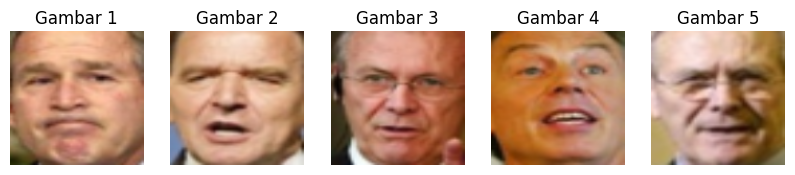

Ukuran gambar sebelum resize: (62, 47, 3)
Ukuran gambar setelah resize: (128, 128, 3)


In [ ]:
 #@title Penyesuaian ukuran gambar
# Persiapan data
X = faces.images
y = faces.target

# Pembuatan fungsi untuk meresize image
def resize_images(images, size=(128, 128)):
    # Resize semua gambar menggunakan OpenCV
    resized_images = [cv.resize(img, size) for img in images]
    return np.array(resized_images)

# Memanggil fungsi untuk meresize image
resized_images = resize_images(X, size=(128, 128))

# Membuat fungsi untuk menampilkan beberapa gambar yang telah diresize (pengecekkan)
def show_resized_images(images, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')  # Jika gambar berwarna, hilangkan cmap='gray'
        plt.title(f"Gambar {i+1}")
        plt.axis('off')
    plt.show()

# Menampilkan gambar setelah diresize
show_resized_images(resized_images, num_images=5)

# Pengecekan ukuran gambar sebelum dan sesudah
print(f"Ukuran gambar sebelum resize: {X[0].shape}")
print(f"Ukuran gambar setelah resize: {resized_images[0].shape}")

Berikut adalah penjelasan kode yang sudah diberikan:

* `X = faces.images`  
  Menyimpan gambar dari dataset `faces` ke dalam variabel `X`. Ini adalah array dari gambar wajah yang digunakan dalam tugas klasifikasi.

* `y = faces.target`  
  Menyimpan label target (klasifikasi) dari dataset `faces` ke dalam variabel `y`. Label ini berisi identitas atau kategori dari gambar-gambar wajah.

* `def resize_images(images, size=(128, 128)):`  
  Mendefinisikan fungsi `resize_images` untuk mengubah ukuran gambar. Fungsi ini akan menerima parameter berupa gambar dan ukuran target `size` yang akan digunakan untuk meresize (di sini ukuran default adalah 128x128 piksel).

  - `resized_images = [cv.resize(img, size) for img in images]`:  
    Menggunakan fungsi OpenCV `cv.resize()` untuk meresize setiap gambar dalam dataset ke ukuran yang ditentukan. Perintah ini menggunakan list comprehension untuk melakukan operasi ini pada seluruh dataset secara efisien.

  - `return np.array(resized_images)`:  
    Mengembalikan array gambar yang telah diresize dalam bentuk array numpy untuk kemudahan manipulasi lebih lanjut.

* `resized_images = resize_images(X, size=(128, 128))`  
  Memanggil fungsi `resize_images()` dengan parameter `X` (gambar asli) dan mengubah ukuran setiap gambar menjadi 128x128 piksel. Hasilnya disimpan dalam variabel `resized_images`.

* `def show_resized_images(images, num_images=5):`  
  Mendefinisikan fungsi `show_resized_images()` untuk menampilkan beberapa gambar dari dataset yang telah diresize.

  - `plt.figure(figsize=(10, 5))`:  
    Membuat figure dengan ukuran 10x5 untuk menampilkan gambar.

  - `plt.subplot(1, num_images, i + 1)`:  
    Membuat sub-plot sebanyak `num_images` (dalam hal ini, 5 gambar akan ditampilkan dalam satu baris).

  - `plt.imshow(images[i], cmap='gray')`:  
    Menampilkan gambar yang telah diresize. Jika gambar berwarna, parameter `cmap='gray'` dapat dihilangkan.

  - `plt.title(f"Gambar {i+1}")`:  
    Menambahkan judul pada setiap gambar, misalnya "Gambar 1", "Gambar 2", dan seterusnya.

  - `plt.axis('off')`:  
    Menghilangkan sumbu (axis) untuk menampilkan gambar tanpa garis koordinat.

  - plt.show():  
    Menampilkan gambar-gambar yang telah diresize pada jendela plot.

* show_resized_images(resized_images, num_images=5)`  
  Memanggil fungsi `show_resized_images()` untuk menampilkan 5 gambar yang telah diresize.

* `print(f"Ukuran gambar sebelum resize: {X[0].shape}")`  
  Menampilkan ukuran gambar asli sebelum diresize. `X[0]` menunjukkan gambar pertama dalam dataset asli.

* `print(f"Ukuran gambar setelah resize: {resized_images[0].shape}")`  
  Menampilkan ukuran gambar setelah diresize untuk pengecekan apakah gambar berhasil diubah ukurannya sesuai target (128x128).

Outputnya akan menampilkan 5 gambar dari dataset yang telah diresize menjadi ukuran 128x128 piksel, serta ukuran gambar sebelum dan sesudah resize di terminal.

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
# Ekstraksi fitur histogram dengan normalisasi
def extract_normalized_histogram_features(images, bins=256):
    features = []
    for image in images:
        # Ekstraksi histogram untuk setiap channel warna (R, G, B)
        hist_r = cv.calcHist([image], [0], None, [bins], [0, 256]).flatten()
        hist_g = cv.calcHist([image], [1], None, [bins], [0, 256]).flatten()
        hist_b = cv.calcHist([image], [2], None, [bins], [0, 256]).flatten()

        # Normalisasi histogram sehingga setiap histogram memiliki total nilai 1
        hist_r = hist_r / np.sum(hist_r)
        hist_g = hist_g / np.sum(hist_g)
        hist_b = hist_b / np.sum(hist_b)

        # Menggabungkan histogram yang sudah dinormalisasi
        features.append(np.concatenate([hist_r, hist_g, hist_b]))

    return np.array(features)

# Menggunakan fungsi untuk ekstraksi histogram dengan normalisasi
X_features_normalized = extract_normalized_histogram_features(resized_images)

# Pengecekan bentuk dari fitur yang dihasilkan
print(f"Normalized Histogram shape: {X_features_normalized.shape}")


Normalized Histogram shape: (1140, 768)


Berikut adalah penjelasan kode yang diberikan:

* `def extract_normalized_histogram_features(images, bins=256):`  
  Fungsi `extract_normalized_histogram_features()` didefinisikan untuk mengekstrak fitur histogram dari gambar dan kemudian menormalisasinya. Parameter `bins=256` menunjukkan jumlah bin pada histogram, yang berarti rentang intensitas warna akan dibagi menjadi 256 interval (biasanya untuk gambar 8-bit).

* `features = []`:  
  List kosong `features` digunakan untuk menyimpan fitur histogram yang akan dihasilkan dari setiap gambar.

* `for image in images:`  
  Loop ini digunakan untuk mengiterasi setiap gambar dalam dataset `images` dan mengekstrak histogram dari setiap gambar.

* `hist_r = cv.calcHist([image], [0], None, [bins], [0, 256]).flatten()`:  
  - `cv.calcHist()` menghitung histogram dari gambar untuk channel warna tertentu (dalam hal ini, channel warna merah atau R, diindikasikan oleh `[0]`).
  - `None` menunjukkan bahwa tidak ada mask yang digunakan, sehingga histogram dihitung untuk seluruh gambar.
  - `[bins]` menentukan jumlah bin histogram (256).
  - `[0, 256]` menunjukkan rentang intensitas warna dari 0 hingga 255.
  - `.flatten()` mengubah hasil histogram dari bentuk 2D menjadi 1D array.

  Hal yang sama juga dilakukan untuk channel warna hijau (G) dan biru (B) dengan `hist_g` dan `hist_b`, tetapi channel yang digunakan adalah `[1]` dan `[2]` untuk masing-masing.

* `hist_r = hist_r / np.sum(hist_r)`  
  Normalisasi histogram sehingga jumlah total elemen dalam histogram adalah 1. Ini dilakukan dengan membagi setiap elemen histogram dengan jumlah total elemen di histogram tersebut. Langkah ini memastikan bahwa histogram dari semua gambar dapat dibandingkan satu sama lain meskipun ukurannya berbeda.

  Langkah ini diulang untuk `hist_g` (channel hijau) dan `hist_b` (channel biru).

* `features.append(np.concatenate([hist_r, hist_g, hist_b]))`:  
  Setelah histogram untuk masing-masing channel warna (R, G, B) dinormalisasi, ketiga histogram tersebut digabungkan menjadi satu vektor fitur menggunakan `np.concatenate()`. Fitur tersebut kemudian ditambahkan ke list `features`.

* `return np.array(features)`:  
  Setelah histogram semua gambar diekstraksi dan dinormalisasi, list `features` dikonversi menjadi array numpy dan dikembalikan sebagai output dari fungsi ini.

* `X_features_normalized = extract_normalized_histogram_features(resized_images)`:  
  Memanggil fungsi `extract_normalized_histogram_features()` untuk dataset `resized_images`, yang telah diubah ukurannya sebelumnya, dan menyimpan hasil ekstraksi fitur histogram ke dalam variabel `X_features_normalized`.

* `print(f"Normalized Histogram shape: {X_features_normalized.shape}")`:  
  Menampilkan dimensi dari fitur yang dihasilkan setelah histogram diekstraksi dan dinormalisasi. Outputnya akan menunjukkan jumlah gambar yang diproses serta panjang vektor fitur histogram per gambar.

### Output yang diharapkan:
- Akan menampilkan bentuk (shape) dari `X_features_normalized`, seperti `(jumlah_gambar, panjang_vektor_fitur_histogram)`, di mana panjang vektor fitur akan menjadi `3 * bins` karena setiap gambar memiliki 3 channel warna dan setiap channel memiliki 256 bin histogram.

# Build Model

In [ ]:
#@title **Split data**
# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_features_normalized, y, test_size=0.2, random_state=42)

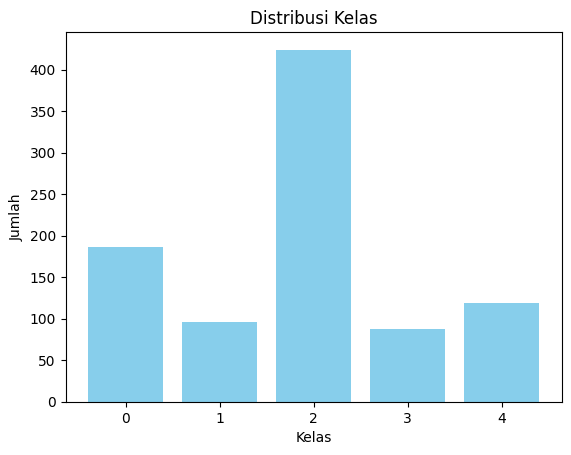

In [ ]:
from collections import Counter

# Hitung distribusi kelas
counter = Counter(y_train)

# Membuat bar plot untuk distribusi kelas
plt.bar(counter.keys(), counter.values(), color='skyblue')

# Menambahkan judul dan label
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()


**Keterangan :**
1. Menghitung Distribusi Kelas
> Counter: Menggunakan kelas Counter dari modul collections untuk menghitung jumlah kemunculan setiap kelas dalam data pelatihan (y_train). Ini memberikan distribusi kelas yang ada.
2. Membuat Bar Plot untuk Distribusi Kelas
> plt.bar(...): Membuat diagram batang untuk menampilkan distribusi kelas:
>> - counter.keys(): Menjadi label pada sumbu x (kelas).
>> - counter.values(): Menjadi nilai pada sumbu y (jumlah setiap kelas).
>> - color='skyblue': Menetapkan warna batang menjadi biru muda.
3. Menambahkan Judul dan Label
> Menambahkan judul, label sumbu x, dan label sumbu y pada plot untuk memberikan konteks tentang apa yang ditampilkan.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dicari
param_grid = {
    'C': [0.1, 1, 10, 100],  # Nilai C menentukan seberapa besar penalti untuk kesalahan
    'kernel': ['rbf'],  # Kernel SVM: linear atau radial basis function (rbf)
    'gamma': [0.0001, 0.0005, 0.001, 0.005]  # Parameter gamma untuk kernel rbf
}

# Buat model SVM
svc = SVC(random_state=42)

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik dari hasil tuning
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


**Keterangan :**
1. Definisi Parameter untuk Pencarian
> param_grid: Kamus yang berisi parameter yang akan dicari untuk model Support Vector Machine (SVM):
>> - C: Nilai penalti untuk kesalahan klasifikasi. Semakin besar nilainya, semakin kecil toleransi terhadap kesalahan.
>> - kernel: Jenis kernel yang digunakan; di sini hanya rbf (Radial Basis Function).
>> - gamma: Parameter yang mengontrol radius pengaruh dari titik data dalam kernel rbf. Nilai yang lebih kecil akan membuat model lebih umum.
2. Membuat Model SVM
> svc = SVC(random_state=42) : Membuat instance model SVM dengan seed acak untuk konsistensi hasil.
3. GridSearchCV untuk Mencari Parameter Terbaik
> GridSearchCV: Digunakan untuk mencari kombinasi parameter terbaik dengan teknik pencarian grid.
>> - cv=3: Menggunakan 3-fold cross-validation untuk mengevaluasi model.
>> - scoring='accuracy': Menggunakan akurasi sebagai metrik untuk mengevaluasi model.
>> - verbose=2: Menampilkan informasi lebih detail selama pencarian.
>> - n_jobs=-1: Menggunakan semua inti CPU yang tersedia untuk mempercepat proses pencarian.
4. Mendapatkan Parameter Terbaik
> - grid_search.best_params_: Mendapatkan kombinasi parameter terbaik yang ditemukan.
> - grid_search.best_estimator_: Mendapatkan model terbaik dengan parameter yang dioptimalkan.

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

Akurasi Model Terbaik (Data Uji): 46.49%
Akurasi Model Terbaik (Data Training): 46.49%


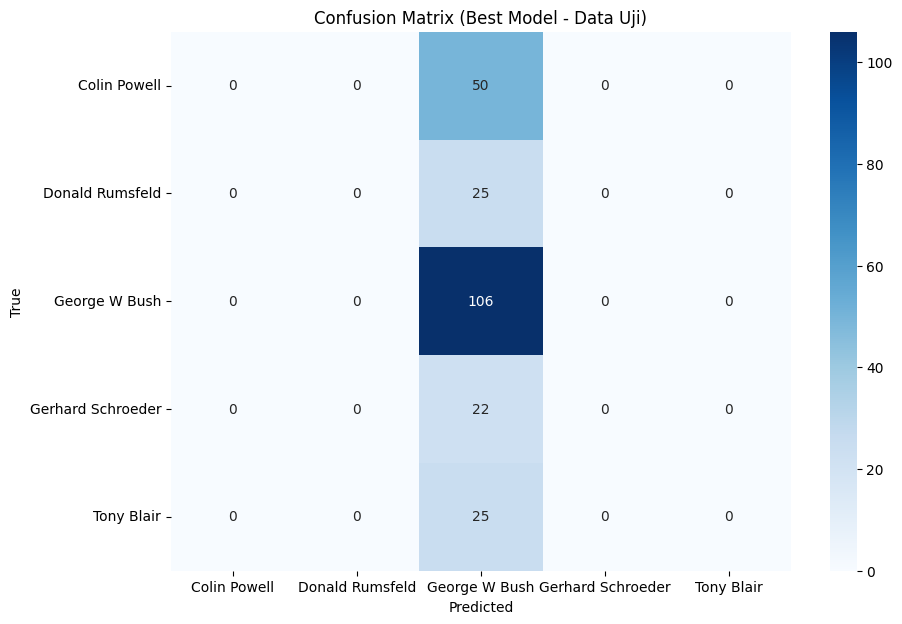

Classification Report (Best Model - Data Uji):
                   precision    recall  f1-score   support

     Colin Powell       1.00      0.00      0.00        50
  Donald Rumsfeld       1.00      0.00      0.00        25
    George W Bush       0.46      1.00      0.63       106
Gerhard Schroeder       1.00      0.00      0.00        22
       Tony Blair       1.00      0.00      0.00        25

         accuracy                           0.46       228
        macro avg       0.89      0.20      0.13       228
     weighted avg       0.75      0.46      0.30       228



In [ ]:
# Menggunakan model terbaik untuk prediksi pada data uji
y_pred_best = best_model.predict(X_test)

# Menghitung akurasi pada data uji
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model Terbaik (Data Uji): {accuracy_best * 100:.2f}%")

# Menghitung akurasi pada data training
y_train_pred_best = best_model.predict(X_train)
accuracy_train_best = accuracy_score(y_train, y_train_pred_best)
print(f"Akurasi Model Terbaik (Data Training): {accuracy_train_best * 100:.2f}%")

# Menampilkan confusion matrix untuk model terbaik pada data uji
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix (Best Model - Data Uji)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Menampilkan classification report untuk model terbaik pada data uji
class_report_best = classification_report(y_test, y_pred_best, target_names=faces.target_names, zero_division=1)

print("Classification Report (Best Model - Data Uji):")
print(class_report_best)


**Keterangan :**
1. Memprediksi dengan Menggunakan Model Terbaik
> best_model.predict(X_test): Menggunakan model terbaik yang telah dilatih sebelumnya untuk memprediksi label pada data pengujian (X_test), dan hasilnya disimpan dalam y_pred_best.
2. Menghitung Akurasi
> accuracy_score(y_test, y_pred_best): Menghitung akurasi model dengan membandingkan prediksi (y_pred_best) dengan label sebenarnya (y_test). Menampilkan akurasi dalam persen dengan dua digit desimal.
3. Confusion Matrix untuk Model Terbaik
python
> confusion_matrix(y_test, y_pred_best): Membuat matriks kebingungan untuk membandingkan prediksi dan label sebenarnya.
Visualisasi: Menggunakan seaborn untuk menampilkan matriks kebingungan dalam bentuk heatmap.
4. Classification Report untuk Model Terbaik
> classification_report(y_test, y_pred_best, ...): Menampilkan laporan klasifikasi yang mencakup precision, recall, f1-score, dan support untuk setiap kelas.
Menampilkan laporan klasifikasi untuk model terbaik.

## Mencoba menambah akurasi dengan digabung dengan fitur yang lain yaitu Histogram of Oriented Gradients (HOG)

In [ ]:
from skimage.feature import hog

def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    hog_features = []
    for image in images:
        # Extract HOG features
        features = hog(image,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       orientations=orientations,
                       channel_axis=-1)
        hog_features.append(features)
    return np.array(hog_features)

# Extract HOG features
X_hog_features = extract_hog_features(resized_images)

# Check the shape of the extracted HOG features
print(f"HOG Features shape: {X_hog_features.shape}")


HOG Features shape: (1140, 8100)


**Keterangan :**
1. Fungsi Ekstraksi Fitur HOG
        def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
        hog_features = []
        for image in images:
        features = hog(image,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       orientations=orientations,
                       channel_axis=-1)
        hog_features.append(features)
        return np.array(hog_features)

> extract_hog_features: Fungsi ini mengekstrak fitur Histogram of Oriented Gradients (HOG) dari daftar gambar.
>> - pixels_per_cell, cells_per_block, dan orientations: Parameter untuk mengatur ukuran sel piksel, blok sel, dan jumlah orientasi gradien.
>> - hog(image, ...): Fungsi dari scikit-image yang digunakan untuk menghitung fitur HOG dari setiap gambar.
>> - Fitur yang diekstrak untuk setiap gambar disimpan dalam list dan dikembalikan sebagai array NumPy.

2. Ekstraksi Fitur HOG
> X_hog_features = extract_hog_features(resized_images) : Memanggil fungsi extract_hog_features untuk mengekstrak fitur HOG dari gambar yang telah diubah ukurannya (resized_images).

3. Pengecekan Bentuk Fitur HOG
> print(f"HOG Features shape: {X_hog_features.shape}") : Menampilkan bentuk array fitur HOG yang telah diekstrak untuk memeriksa dimensi hasil ekstraksi.

In [ ]:
# Gabungkan fitur histogram yang dinormalisasi dan HOG
X_combined_features = np.hstack((X_features_normalized, X_hog_features))

# Pengecekan bentuk dari fitur gabungan
print(f"Combined Features shape: {X_combined_features.shape}")


Combined Features shape: (1140, 8868)


**Keterangan :**
Source code ini menggabungkan fitur histogram dan HOG, lalu memeriksa dimensi hasil gabungan

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_combined_features, y, test_size=0.2, random_state=42, stratify=y)

# Train model SVM
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

**Keterangan :**
> - train_test_split: Membagi data menjadi 80% untuk pelatihan (X_train, y_train) dan 20% untuk pengujian (X_test, y_test), dengan menjaga distribusi kelas yang sama.
> - SVC: Membuat model Support Vector Machine dengan kernel RBF untuk klasifikasi non-linear.
> - model.fit: Melatih model menggunakan data pelatihan.

Akurasi Model dengan Fitur Gabungan (Histogram + HOG) pada Data Uji: 89.04%
Akurasi Model dengan Fitur Gabungan (Histogram + HOG) pada Data Training: 99.56%
Classification Report (Data Uji):
                   precision    recall  f1-score   support

     Colin Powell       0.98      0.96      0.97        47
  Donald Rumsfeld       1.00      0.67      0.80        24
    George W Bush       0.81      0.99      0.89       106
Gerhard Schroeder       1.00      0.59      0.74        22
       Tony Blair       1.00      0.83      0.91        29

         accuracy                           0.89       228
        macro avg       0.96      0.81      0.86       228
     weighted avg       0.91      0.89      0.89       228



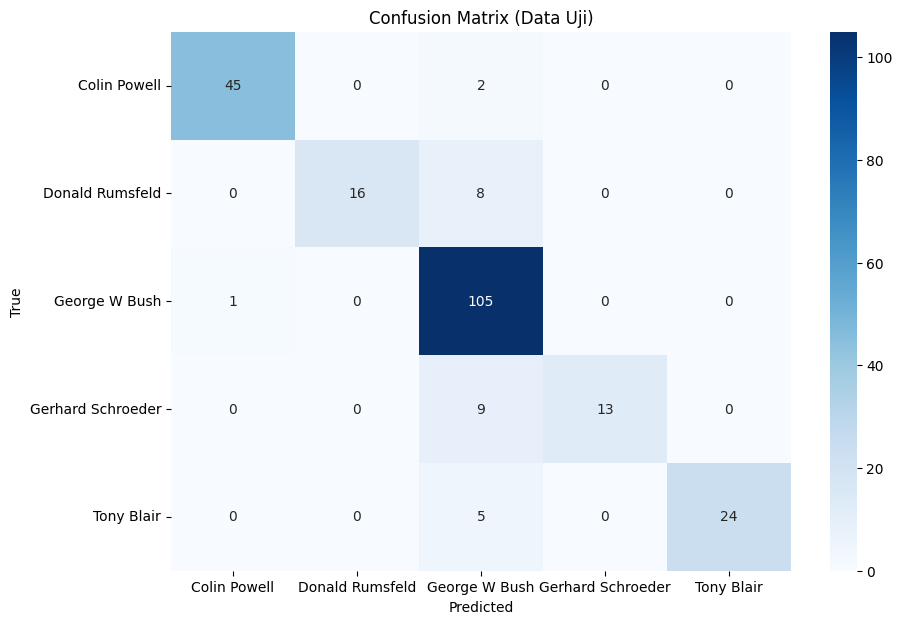

In [ ]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model dengan Fitur Gabungan (Histogram + HOG) pada Data Uji: {accuracy * 100:.2f}%")

# Prediksi data training
y_train_pred = model.predict(X_train)

# Evaluasi performa model pada data training
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Akurasi Model dengan Fitur Gabungan (Histogram + HOG) pada Data Training: {accuracy_train * 100:.2f}%")

# Classification report pada data uji
print("Classification Report (Data Uji):")
print(classification_report(y_test, y_pred, target_names=faces.target_names))

# Confusion Matrix pada data uji
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix (Data Uji)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Keterangan :**
1. Memprediksi Data Uji
> model.predict(X_test) Merupakan model yang telah dilatih digunakan untuk memprediksi label pada data pengujian (X_test). Hasil prediksi disimpan dalam variabel y_pred.

2. Akurasi
> accuracy_score(y_test, y_pred) Merupakan penghitungan akurasi model, yaitu persentase prediksi yang benar dibandingkan dengan label sebenarnya (y_test). Hasil akurasi nantinya ditampilkan dalam persen dengan format dua digit desimal

3. Classification Report
> - classification_report(y_test, y_pred, target_names=faces.target_names): Menampilkan laporan klasifikasi yang berisi metrik penting.
> - target_names=faces.target_names: Memberikan nama label untuk masing-masing kelas yang diprediksi, kemungkinan besar merupakan nama wajah yang diprediksi dalam tugas pengenalan wajah.

4. Confusion Matrix
> confusion_matrix(y_test, y_pred): Membuat matriks kebingungan yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

In [ ]:
#@title memakai model random forest
from sklearn.ensemble import RandomForestClassifier

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best RandomForest Model Accuracy (Test Data): 66.67%
Best RandomForest Model Accuracy (Training Data): 100.00%


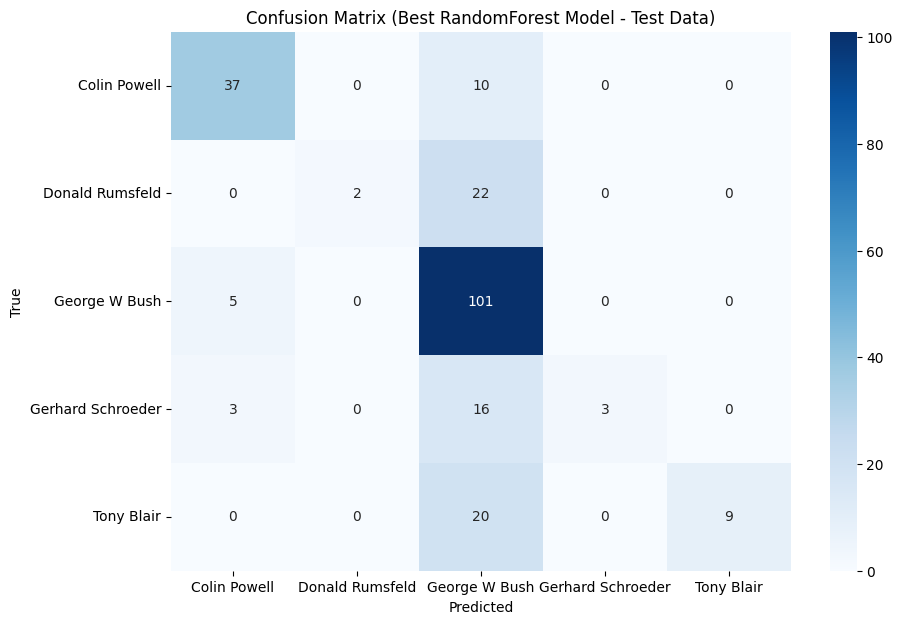

Classification Report (Best RandomForest Model - Test Data):
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.79      0.80        47
  Donald Rumsfeld       1.00      0.08      0.15        24
    George W Bush       0.60      0.95      0.73       106
Gerhard Schroeder       1.00      0.14      0.24        22
       Tony Blair       1.00      0.31      0.47        29

         accuracy                           0.67       228
        macro avg       0.88      0.45      0.48       228
     weighted avg       0.78      0.67      0.61       228



In [ ]:
# Define parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best Parameters for RandomForest: {best_params_rf}")

# Predict using the best RandomForest model on test data
y_pred_best_rf = best_model_rf.predict(X_test)

# Calculate accuracy on test data
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best RandomForest Model Accuracy (Test Data): {accuracy_best_rf * 100:.2f}%")

# Predict using the best RandomForest model on training data
y_train_pred_best_rf = best_model_rf.predict(X_train)

# Calculate accuracy on training data
accuracy_train_best_rf = accuracy_score(y_train, y_train_pred_best_rf)
print(f"Best RandomForest Model Accuracy (Training Data): {accuracy_train_best_rf * 100:.2f}%")

# Confusion matrix for the best RandomForest model on test data
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt="d", cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix (Best RandomForest Model - Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report for the best RandomForest model on test data
class_report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=faces.target_names, zero_division=1)

print("Classification Report (Best RandomForest Model - Test Data):")
print(class_report_best_rf)


**Keterangan :**

1. Parameter Grid untuk Random Forest
> param_grid_rf: Ini adalah grid dari parameter yang akan diuji selama proses tuning. Setiap kombinasi dari parameter yang diberikan akan dievaluasi:
>> - n_estimators: Jumlah pohon yang akan dibuat dalam hutan. Dicoba dengan nilai 50, 100, dan 200.
>> - max_depth: Kedalaman maksimum setiap pohon. Jika None, pohon akan tumbuh sampai semua daun murni atau sampai semua daun mengandung kurang dari min_samples_split.
>> - min_samples_split: Jumlah minimum sampel yang dibutuhkan untuk membagi simpul internal.
>> - min_samples_leaf: Jumlah minimum sampel yang dibutuhkan di daun terminal.

2. Membuat Model Random Forest
> Membuat model RandomForestClassifier dengan seed acak 42 untuk menjaga hasil yang konsisten.

3. GridSearchCV untuk Hyperparameter Tuning
> GridSearchCV: merupakan teknik untuk mencari kombinasi parameter terbaik dengan mencoba setiap kombinasi dalam grid. Di sini:
>> - cv=3: Cross-validation dilakukan 3 kali untuk setiap kombinasi parameter.
>> - scoring='accuracy': Akurasi digunakan sebagai metrik untuk mengevaluasi performa model.
>> - n_jobs=-1: Menjalankan proses secara paralel di seluruh inti CPU yang tersedia untuk mempercepat komputasi.
>>- fit(X_train, y_train): Melatih model dengan berbagai kombinasi parameter pada data pelatihan.

4. Mendapatkan Parameter dan Model Terbaik
> - best_params_rf: Kombinasi parameter terbaik yang ditemukan oleh GridSearchCV.
> - best_model_rf: Model RandomForest dengan parameter terbaik.

5. Prediksi dengan Model Random Forest Terbaik
> Menggunakan model terbaik yang ditemukan oleh GridSearchCV untuk memprediksi data uji (X_test).

6. Menghitung Akurasi
> - accuracy_score(y_test, y_pred_best_rf): Menghitung akurasi dari model terbaik berdasarkan prediksi pada data uji. Lalu, hasil akurasinya akan ditampilkan dalam bentuk persen.

7. Confusion Matrix
> - confusion_matrix(y_test, y_pred_best_rf): Membuat matriks kebingungan untuk melihat jumlah prediksi yang benar dan salah untuk setiap kelas.
> - sns.heatmap: Membuat visualisasi heatmap dari matriks kebingungan, dengan anotasi angka untuk memudahkan pembacaan.

8. Classification Report
> classification_report: Menampilkan metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas dalam data.
>> zero_division=1: Mencegah kesalahan pembagian nol dalam laporan jika ada kelas yang tidak terdeteksi.

Akurasi Model dengan Fitur HOG (Data Uji): 89.04%
Akurasi Model dengan Fitur HOG (Data Training): 99.67%
Classification Report (Data Uji):
                   precision    recall  f1-score   support

     Colin Powell       0.98      0.96      0.97        47
  Donald Rumsfeld       1.00      0.67      0.80        24
    George W Bush       0.81      0.99      0.89       106
Gerhard Schroeder       1.00      0.59      0.74        22
       Tony Blair       1.00      0.83      0.91        29

         accuracy                           0.89       228
        macro avg       0.96      0.81      0.86       228
     weighted avg       0.91      0.89      0.89       228



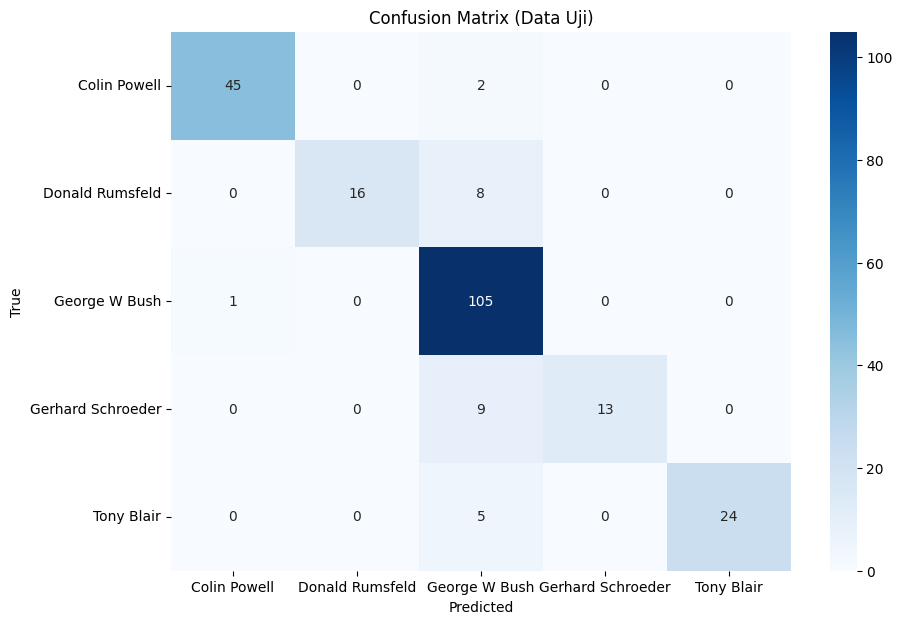

In [ ]:
# Mencoba menggunakan HOG saja
X_train, X_test, y_train, y_test = train_test_split(X_hog_features, y, test_size=0.2, random_state=42, stratify=y)

# Train model SVM
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model dengan Fitur HOG (Data Uji): {accuracy * 100:.2f}%")

# Prediksi data training
y_train_pred = model.predict(X_train)

# Evaluasi performa model pada data training
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Akurasi Model dengan Fitur HOG (Data Training): {accuracy_train * 100:.2f}%")

# Classification report pada data uji
print("Classification Report (Data Uji):")
print(classification_report(y_test, y_pred, target_names=faces.target_names))

# Confusion Matrix untuk data uji
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix (Data Uji)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Keterangan :**
1. Membagi Data
> - X_hog_features: merupakan kumpulan fitur yang diekstrak menggunakan HOG (Histogram of Oriented Gradients), yang sering digunakan dalam pengenalan wajah.
> - y: merupakan label target yang sesuai dengan data dalam X_hog_features.
> - train_test_split: Fungsi ini membagi dataset menjadi set data pelatihan dan pengujian.
>> - test_size=0.2: 20% dari data akan digunakan sebagai set pengujian, sedangkan 80% lainnya untuk pelatihan.
>> - random_state=42: Menjaga hasil tetap konsisten dengan menggunakan seed
acak yang tetap, yaitu 42.
>> - stratify=y: Membagi data secara proporsional berdasarkan kelas dalam y, agar distribusi kelas antara data pelatihan dan pengujian tetap sama.

2. Melatih Model SVM
> - SVC: Ini adalah Support Vector Classifier, algoritma yang digunakan untuk klasifikasi.
>> - kernel='rbf': Kernel Radial Basis Function (RBF), yang sering digunakan untuk masalah klasifikasi non-linear.
>> - C=1.0: Parameter regulasi yang mengontrol seberapa ketat model menyesuaikan dengan data pelatihan. Nilai yang lebih tinggi membuat model lebih ketat, sedangkan nilai yang lebih rendah memberikan lebih banyak fleksibilitas.
>> - random_state=42: Untuk menjaga konsistensi dalam pemilihan model.
> - fit(X_train, y_train): Melatih model menggunakan data pelatihan (X_train dan y_train).

3. Prediksi Data Uji
> y_pred = model.predict(X_test) merupakan model yang telah dilatih digunakan untuk memprediksi label pada data pengujian (X_test). Hasil prediksi disimpan dalam variabel y_pred.

4. Evaluasi Performa Model
> accuracy_score(y_test, y_pred) : menghitung akurasi dari model, yaitu persentase prediksi yang benar terhadap data pengujian. Akurasi ditampilkan dalam persen dengan format dua digit desimal.

5. Classification Report
> - classification_report: Menampilkan laporan evaluasi yang lebih mendetail, termasuk precision, recall, f1-score, dan support untuk setiap kelas dalam dataset.
> - target_names: Nama-nama dari kelas target (misalnya, nama orang dalam pengenalan wajah) yang dijadikan label pada hasil prediksi.

6. Confussion Matrix
> - confusion_matrix(y_test, y_pred): Membuat matriks kebingungan untuk mengevaluasi berapa banyak prediksi yang benar dan salah untuk setiap kelas.
> - sns.heatmap: Menggunakan seaborn untuk membuat visualisasi heatmap dari matriks kebingungan, dengan nilai yang ditampilkan (annot=True) dalam format desimal (fmt="d").
> - cmap='Blues': Menentukan skema warna untuk heatmap.
> - xticklabels dan yticklabels: Memberikan label nama target (kelas) pada sumbu x dan y.
